Лабораторная работа №3

In [1]:
%pip install pandas
%pip install scikit-learn
%pip install gensim
%pip install kneed


[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import re
import nltk
import math
import matplotlib.pyplot as plt
import seaborn as sns
import multiprocessing
import string

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from gensim.models import Word2Vec
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from kneed import KneeLocator

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Root\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
import warnings
warnings.filterwarnings('ignore')

Подготовка данных

In [5]:
df = pd.read_csv('dataset.csv')
df.dropna()
del df['guid']
del df['link']
#df = df.head(5000)


df

,title,pubDate,description
0,Ukraine: Angry Zelensky vows to punish Russian...,"Mon, 07 Mar 2022 08:01:56 GMT",The Ukrainian president says the country will ...
1,War in Ukraine: Taking cover in a town under a...,"Sun, 06 Mar 2022 22:49:58 GMT","Jeremy Bowen was on the frontline in Irpin, as..."
2,Ukraine war 'catastrophic for global food',"Mon, 07 Mar 2022 00:14:42 GMT",One of the world's biggest fertiliser firms sa...
3,Manchester Arena bombing: Saffie Roussos's par...,"Mon, 07 Mar 2022 00:05:40 GMT",The parents of the Manchester Arena bombing's ...
4,Ukraine conflict: Oil price soars to highest l...,"Mon, 07 Mar 2022 08:15:53 GMT",Consumers are feeling the impact of higher ene...
...,...,...,...
32922,Reiten scores four in Chelsea's 8-0 win over B...,"Sun, 05 May 2024 23:06:56 GMT",Watch highlights as Chelsea put eight goals pa...
32923,"Girl, 10, dies in Bradford house fire","Sun, 05 May 2024 12:55:00 GMT",A woman and three other children manage to esc...
32924,Man nailed to fence in 'sinister' Bushmills at...,"Sun, 05 May 2024 15:52:46 GMT",The man in his 20s was found with a nail throu...
32925,Swinney to become SNP leader after challenger ...,"Sun, 05 May 2024 22:38:27 GMT",A veteran activist had secured a nomination bu...


In [6]:
punctuation = string.punctuation# + '’'
stopwords_list = stopwords.words('english')
#stopwords_list.append("'s")

lemmatizer = WordNetLemmatizer()

def prepare_text(text):
    text = text.lower()
    tokens = re.findall('[A-Za-z]+\-[A-Za-z]+|[A-Za-z]+', text)

    result = []

    for token in tokens:
        if token not in stopwords_list:
            result.append(token)

    return result

def normal_form(tokens):
    result = []

    for token in tokens:
        result.append(lemmatizer.lemmatize(token))

    return result


df['tokens'] = df['description'].apply(lambda text: prepare_text(str(text)))
df['normal_tokens'] = df['tokens'].apply(lambda tokens: ' '.join(normal_form(tokens)))

df['tokens'] = df['tokens'].apply(lambda tokens: ' '.join(tokens))

In [7]:
df

,title,pubDate,description,tokens,normal_tokens
0,Ukraine: Angry Zelensky vows to punish Russian...,"Mon, 07 Mar 2022 08:01:56 GMT",The Ukrainian president says the country will ...,ukrainian president says country forgive forge...,ukrainian president say country forgive forget...
1,War in Ukraine: Taking cover in a town under a...,"Sun, 06 Mar 2022 22:49:58 GMT","Jeremy Bowen was on the frontline in Irpin, as...",jeremy bowen frontline irpin residents came ru...,jeremy bowen frontline irpin resident came rus...
2,Ukraine war 'catastrophic for global food',"Mon, 07 Mar 2022 00:14:42 GMT",One of the world's biggest fertiliser firms sa...,one world biggest fertiliser firms says confli...,one world biggest fertiliser firm say conflict...
3,Manchester Arena bombing: Saffie Roussos's par...,"Mon, 07 Mar 2022 00:05:40 GMT",The parents of the Manchester Arena bombing's ...,parents manchester arena bombing youngest vict...,parent manchester arena bombing youngest victi...
4,Ukraine conflict: Oil price soars to highest l...,"Mon, 07 Mar 2022 08:15:53 GMT",Consumers are feeling the impact of higher ene...,consumers feeling impact higher energy costs f...,consumer feeling impact higher energy cost fue...
...,...,...,...,...,...
32922,Reiten scores four in Chelsea's 8-0 win over B...,"Sun, 05 May 2024 23:06:56 GMT",Watch highlights as Chelsea put eight goals pa...,watch highlights chelsea put eight goals past ...,watch highlight chelsea put eight goal past br...
32923,"Girl, 10, dies in Bradford house fire","Sun, 05 May 2024 12:55:00 GMT",A woman and three other children manage to esc...,woman three children manage escape property ea...,woman three child manage escape property early...
32924,Man nailed to fence in 'sinister' Bushmills at...,"Sun, 05 May 2024 15:52:46 GMT",The man in his 20s was found with a nail throu...,man found nail hand early hours sunday morning,man found nail hand early hour sunday morning
32925,Swinney to become SNP leader after challenger ...,"Sun, 05 May 2024 22:38:27 GMT",A veteran activist had secured a nomination bu...,veteran activist secured nomination agreed bac...,veteran activist secured nomination agreed bac...


TF*IDF

In [8]:
def select_K(data):
    distortions = []
    K = range(1,20)
    for k in K:
        kmeanModel = KMeans(n_clusters=k)
        kmeanModel.fit(data)
        distortions.append(kmeanModel.inertia_)

    kneedle = KneeLocator(K, distortions, curve = "convex", direction="decreasing")

    n_clusters = kneedle.knee
    display(n_clusters)
    kneedle.plot_knee()
    plt.show()

    return K

In [9]:
def proccess_tf_idf(columnName):
    texts = df[columnName].to_list()

    vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
    x = vectorizer.fit_transform(texts).toarray()

    #K = select_K(x)
    K = 3

    kmeans = KMeans(n_clusters=K, random_state=55)
    kmeans.fit_transform(x)
    df[columnName + '_cluster'] = kmeans.labels_

    X_train, X_test, Y_Train, Y_test = train_test_split(x, kmeans.labels_, test_size=0.2, random_state=55)

    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(X_train, Y_Train)
    predictions = knn.predict(X_test).tolist()

    print(accuracy_score(Y_test, predictions))
    print(classification_report(Y_test, predictions))

    pca = PCA(n_components=2, random_state=55)
    pca_vecs = pca.fit_transform(x)
    x0 = pca_vecs[:, 0]
    x1 = pca_vecs[:, 1]

    df[columnName + '_x0'] = x0
    df[columnName + '_x1'] = x1

    plt.figure(figsize=(12, 7))
    plt.title("TF-IDF " + columnName)
    plt.xlabel("x0")
    plt.ylabel('x1')
    sns.scatterplot(data=df, x=columnName + '_x0', y= columnName+'_x1', hue=columnName+'_cluster', palette='deep')
    plt.show()

0.9230185241421196
              precision    recall  f1-score   support

           0       0.63      0.56      0.59       263
           1       0.80      0.85      0.82       859
           2       0.96      0.95      0.95      5464

    accuracy                           0.92      6586
   macro avg       0.80      0.79      0.79      6586
weighted avg       0.92      0.92      0.92      6586



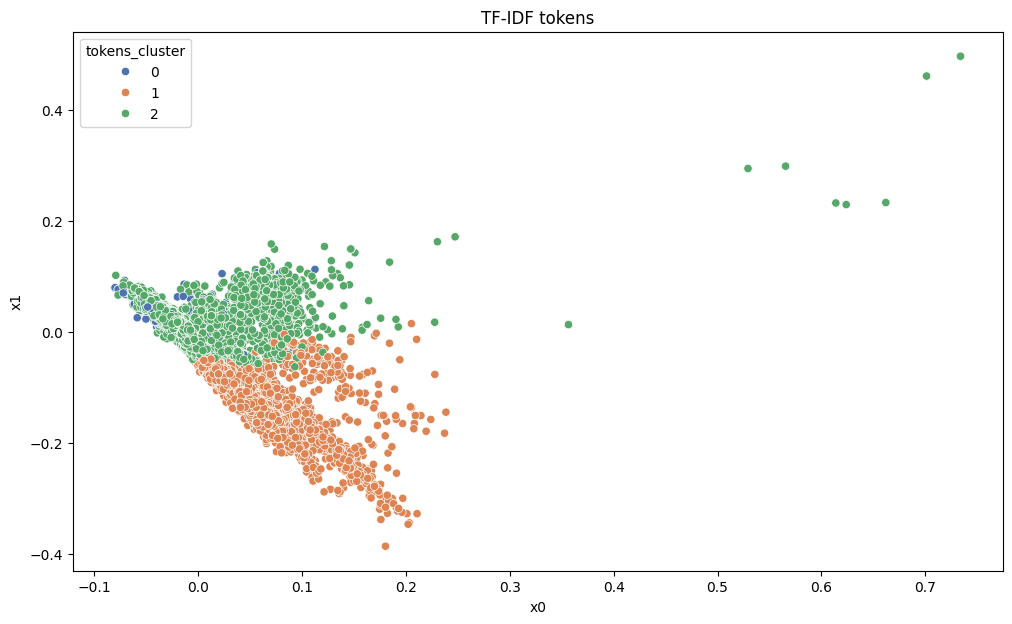

In [10]:
proccess_tf_idf('tokens')

0.8794412389918008
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      5246
           1       0.55      0.30      0.39       574
           2       0.79      0.83      0.81       766

    accuracy                           0.88      6586
   macro avg       0.75      0.69      0.71      6586
weighted avg       0.87      0.88      0.87      6586



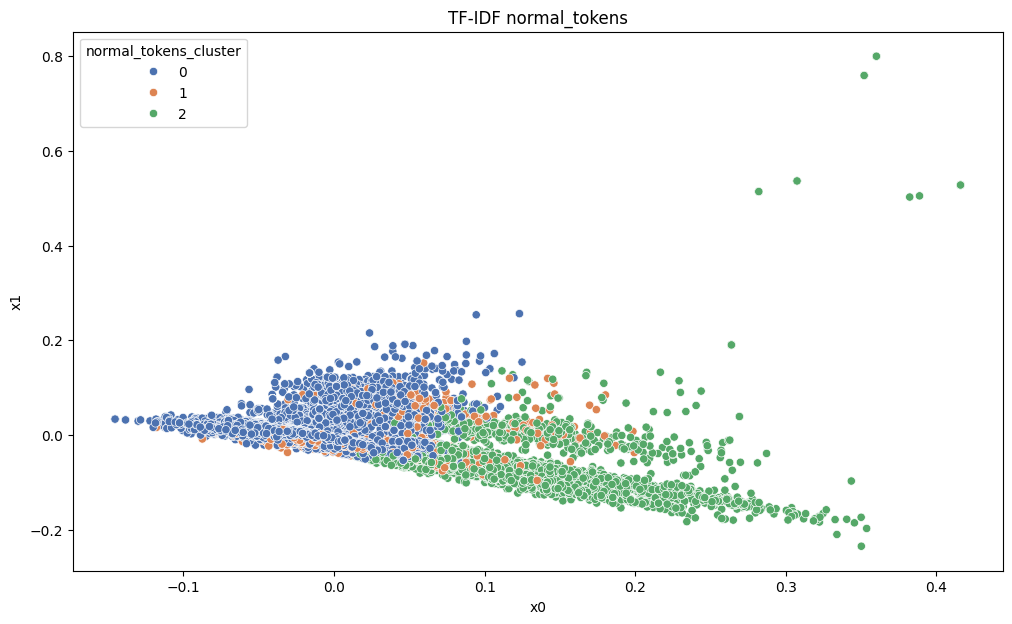

In [11]:
proccess_tf_idf('normal_tokens')

Word2Vec

In [16]:
def process_word2vec(columnName):
    w2v_df = pd.DataFrame(df[columnName]).values.tolist()
    for i in range(len(w2v_df)):
        w2v_df[i] = w2v_df[i][0].split(" ")

    w2vec_model = Word2Vec(min_count=1)
    w2vec_model.build_vocab(w2v_df)
    w2vec_model.train(w2v_df, total_examples=w2vec_model.corpus_count, epochs=100, report_delay=1)

    x = [np.sum(np.array([w2vec_model.wv[i] for i in text.split()]), axis=0) for text in df[columnName]]
    x = normalize(x)

    #K = select_K(x)
    K = 3

    kmeans = KMeans(n_clusters=K, random_state=55)
    kmeans.fit_transform(x)
    df[columnName + '_w2v_cluster'] = kmeans.labels_

    X_train, X_test, Y_Train, Y_test = train_test_split(x, kmeans.labels_, test_size=0.2, random_state=55)

    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(X_train, Y_Train)
    predictions = knn.predict(X_test).tolist()

    print(accuracy_score(Y_test, predictions))
    print(classification_report(Y_test, predictions))

    pca = PCA(n_components=2, random_state=55)
    pca_vecs = pca.fit_transform(x)
    x0 = pca_vecs[:, 0]
    x1 = pca_vecs[:, 1]

    df[columnName + '_w2v_x0'] = x0
    df[columnName + '_w2v_x1'] = x1

    plt.figure(figsize=(12, 7))
    plt.title("TF-IDF " + columnName)
    plt.xlabel("x0")
    plt.ylabel('x1')
    sns.scatterplot(data=df, x=columnName + '_w2v_x0', y= columnName+'_w2v_x1', hue=columnName+'_w2v_cluster', palette='deep')
    plt.show()
    

0.9101123595505618
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      2651
           1       0.92      0.86      0.89      2462
           2       0.94      0.95      0.95      1473

    accuracy                           0.91      6586
   macro avg       0.92      0.91      0.91      6586
weighted avg       0.91      0.91      0.91      6586



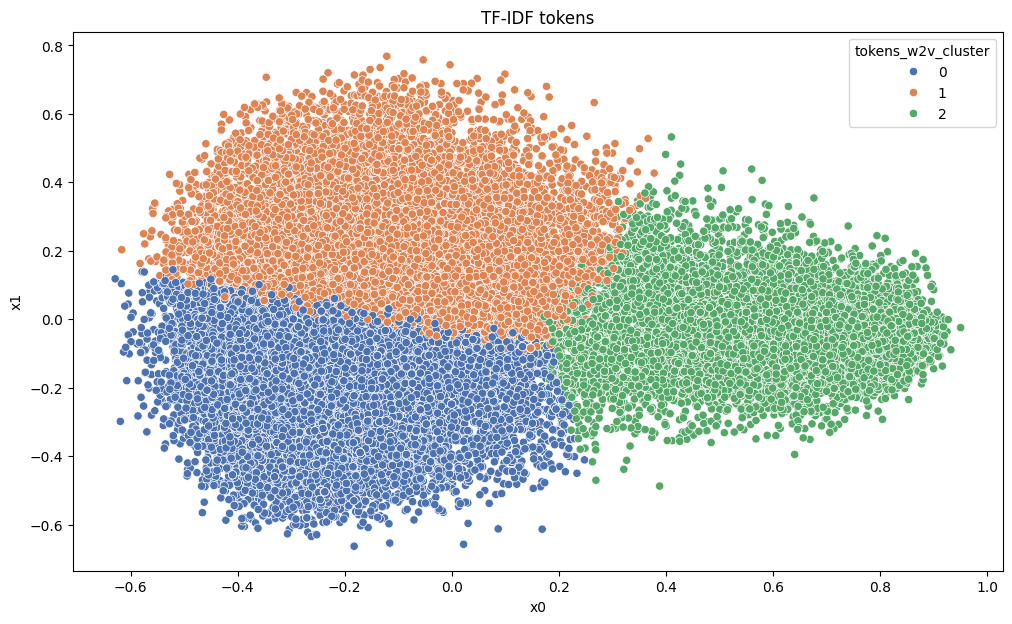

In [17]:
process_word2vec('tokens')

0.9085939872456726
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1468
           1       0.91      0.87      0.89      2565
           2       0.89      0.92      0.91      2553

    accuracy                           0.91      6586
   macro avg       0.91      0.92      0.91      6586
weighted avg       0.91      0.91      0.91      6586



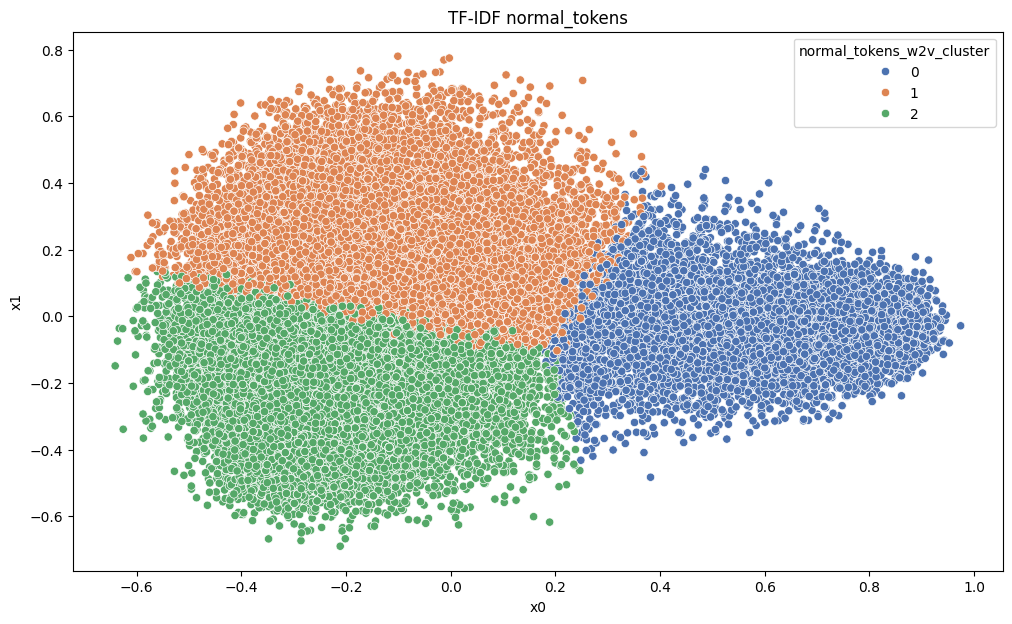

In [18]:
process_word2vec('normal_tokens')

In [19]:
df

,title,pubDate,description,tokens,normal_tokens,tokens_cluster,tokens_x0,tokens_x1,normal_tokens_cluster,normal_tokens_x0,normal_tokens_x1,tokens_w2v_cluster,tokens_w2v_x0,tokens_w2v_x1,normal_tokens_w2v_cluster,normal_tokens_w2v_x0,normal_tokens_w2v_x1
0,Ukraine: Angry Zelensky vows to punish Russian...,"Mon, 07 Mar 2022 08:01:56 GMT",The Ukrainian president says the country will ...,ukrainian president says country forgive forge...,ukrainian president say country forgive forget...,2,-0.043500,0.035426,0,-0.079408,0.011832,1,-0.333782,0.179305,1,-0.369190,0.186966
1,War in Ukraine: Taking cover in a town under a...,"Sun, 06 Mar 2022 22:49:58 GMT","Jeremy Bowen was on the frontline in Irpin, as...",jeremy bowen frontline irpin residents came ru...,jeremy bowen frontline irpin resident came rus...,2,-0.025709,0.029320,0,-0.037076,0.009926,1,-0.294054,0.146386,1,-0.299592,0.141566
2,Ukraine war 'catastrophic for global food',"Mon, 07 Mar 2022 00:14:42 GMT",One of the world's biggest fertiliser firms sa...,one world biggest fertiliser firms says confli...,one world biggest fertiliser firm say conflict...,2,0.031610,-0.049191,1,0.024503,-0.019097,0,-0.053702,-0.430208,2,-0.071198,-0.447207
3,Manchester Arena bombing: Saffie Roussos's par...,"Mon, 07 Mar 2022 00:05:40 GMT",The parents of the Manchester Arena bombing's ...,parents manchester arena bombing youngest vict...,parent manchester arena bombing youngest victi...,2,-0.012629,-0.005421,0,-0.009335,-0.012279,1,-0.036932,0.449901,1,-0.077225,0.426983
4,Ukraine conflict: Oil price soars to highest l...,"Mon, 07 Mar 2022 08:15:53 GMT",Consumers are feeling the impact of higher ene...,consumers feeling impact higher energy costs f...,consumer feeling impact higher energy cost fue...,2,-0.026711,0.039733,0,-0.059266,0.022938,0,-0.263885,-0.480434,2,-0.271002,-0.488622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32922,Reiten scores four in Chelsea's 8-0 win over B...,"Sun, 05 May 2024 23:06:56 GMT",Watch highlights as Chelsea put eight goals pa...,watch highlights chelsea put eight goals past ...,watch highlight chelsea put eight goal past br...,1,0.141953,-0.106582,2,0.181796,-0.019142,2,0.820884,-0.019196,0,0.841639,0.015176
32923,"Girl, 10, dies in Bradford house fire","Sun, 05 May 2024 12:55:00 GMT",A woman and three other children manage to esc...,woman three children manage escape property ea...,woman three child manage escape property early...,2,-0.019008,0.018985,0,0.007186,-0.010877,1,-0.249163,0.367238,1,-0.130132,0.291618
32924,Man nailed to fence in 'sinister' Bushmills at...,"Sun, 05 May 2024 15:52:46 GMT",The man in his 20s was found with a nail throu...,man found nail hand early hours sunday morning,man found nail hand early hour sunday morning,2,-0.019725,0.018256,0,-0.020868,0.003248,1,-0.037696,0.341282,1,0.016071,0.345610
32925,Swinney to become SNP leader after challenger ...,"Sun, 05 May 2024 22:38:27 GMT",A veteran activist had secured a nomination bu...,veteran activist secured nomination agreed bac...,veteran activist secured nomination agreed bac...,2,-0.010168,0.004363,0,-0.010588,-0.002029,2,0.287001,0.009929,1,0.203055,-0.103482
